Assignment 2

Fajri Sofianto

Link Data : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

Guna menghitung statistik dari data tersebut


In [26]:
import math
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import uniform

from datetime import datetime

class color:      # untuk warna teks penjelasan grafik
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
df = pd.read_csv('D:\File_Analisa_Python/nycrollingsales.csv')      #insert file from local drive


## Change anomaly values
df['SALE PRICE'] = df['SALE PRICE'].replace(' -  ',0).astype(float) #replace - (dash) to zero and convert it to float

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])                   #convert SALE DATE to Datetime

df = df.rename(columns={'Unnamed: 0': 'KEY'})                       #rename column Unnamed 0 to KEY

df['YEAR BUILT'] = df['YEAR BUILT'].replace(0,1900)
df['YEAR BUILT'] = df['YEAR BUILT'].replace(1111,1900)              #change year built from 0 to 1900 and 1111 to 1900

df['EASE-MENT'] = df['EASE-MENT'].replace(' ','-')                  #fill column Ease-ment with - (dash)

df.describe()

,KEY,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,8.454800e+04
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1945.965227,1.657485,1.056623e+06
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,35.537798,0.819341,1.038794e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1680.000000,1.000000,0.000000e+00
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,0.000000e+00
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,4.150000e+05
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,8.300000e+05
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


Membaca data borough yang paling laku secara jumlah properti dan jumlah nominal untuk menentukan analisa


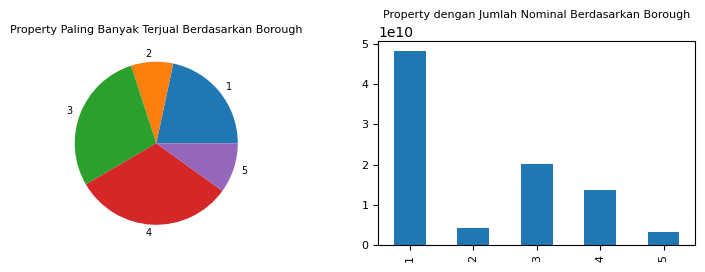

Berdasarkan Jumlah Property yang terjual/pindah tangan, Borough 3 & 4 merupakan borough yang paling banyak sedangkan
berdasarkan Harga, Borough 1 dan 3 merupakan borough yang paling banyak secara nominal


In [4]:
df_count = df.groupby('BOROUGH').count()                                    #Menentukan Data Borough yang akan dianalisa berdasarkan jumlah properti yang terjual &
df_count = df_count.reset_index()
df_count = df_count[['BOROUGH', 'KEY']].rename(columns={'KEY':'COUNT'})

df_sum = df.groupby('BOROUGH').sum(numeric_only=True)
df_sum = df_sum.reset_index().rename(columns={'SALE PRICE' : 'SUM PRICE'})  #Berdasarkan Jumlah Nominal
df_sum = df_sum[['BOROUGH', 'SUM PRICE']]


print('''Membaca data borough yang paling laku secara jumlah properti dan jumlah nominal untuk menentukan analisa''')
fig = plt.figure(figsize=(35,20))

ax0 = fig.add_subplot(3,2,1)
ax1 = fig.add_subplot(3,2,2)

df_count.set_index('BOROUGH').plot.pie(y='COUNT', figsize = (9,9), fontsize= 7, legend = False, ax=ax0)
ax0.set_xlabel('')
ax0.set_ylabel('')
ax0.set_title('Property Paling Banyak Terjual Berdasarkan Borough', fontsize=8)

df_sum.set_index('BOROUGH').plot(kind='bar', ax=ax1, legend=False, fontsize=8)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Property dengan Jumlah Nominal Berdasarkan Borough', fontsize=8)

plt.show()
print('''Berdasarkan Jumlah Property yang terjual/pindah tangan, Borough 3 & 4 merupakan borough yang paling banyak sedangkan
berdasarkan Harga, Borough 1 dan 3 merupakan borough yang paling banyak secara nominal''')

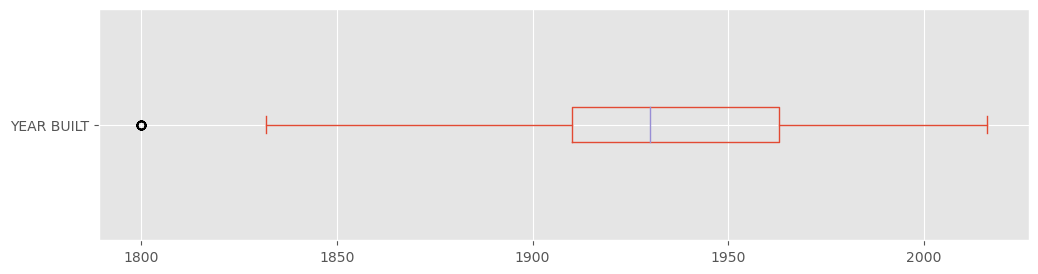

Rata - rata properti dibangun tahun 1941.45
Nilai tengah 1930.0
Nilai Modus 1900
Outliers terlihat sedikit

ModeResult(mode=array([1900], dtype=int64), count=array([1587]))


In [28]:
borough3 = df[(df['BOROUGH'] == 3 ) & (df['SALE PRICE'] != 0)]                  #filter borough 3 dan harga != 0 (bukan balik nama)

plt.style.use('ggplot')
borough3['YEAR BUILT'].plot(kind='box', vert=False, figsize=(12,3))
plt.show()

mean_year = borough3['YEAR BUILT'].mean()                        #Menghitung Rata - rata
median_year = borough3['YEAR BUILT'].median()                    #Menghitung Nilai tengah
mode_year = statistics.mode(borough3['YEAR BUILT'])              #Menghitung Modus
hmean_year = statistics.harmonic_mean(borough3['YEAR BUILT'])    #Menghitung Harmonic Mean
max_year = borough3['YEAR BUILT'].max()                          #Menghitung Nilai Maksimal
min_year = borough3['YEAR BUILT'].min()                          #Menghitung Nilai Minimal
modus_year = scipy.stats.mode(borough3['YEAR BUILT'], axis=None, keepdims=True)  #Menghitung Nilai Modus menggunakan Scipy

print('Rata - rata properti dibangun tahun',round(mean_year,2))
print('Nilai tengah',median_year)
print('Nilai Modus',mode_year)
print('Outliers terlihat sedikit')
print('')
print(modus_year)

In [29]:
print(color.GREEN+'kesimpulan dari data diatas didapat bahwa tahun pembuatan properti di NYC dengan rata - rata',round(mean_year),'''sedangkan nilai tengah dari
tahun pembuatan''',round(median_year),'''dan frekuensi terbanyak properti dibangun tahun''',mode_year,'dengan jumlah 1587 kali'+color.END)

kesimpulan dari data diatas didapat bahwa tahun pembuatan properti di NYC dengan rata - rata 1941 sedangkan nilai tengah dari
tahun pembuatan 1930 dan frekuensi terbanyak properti dibangun tahun 1900 dengan jumlah 1587 kali


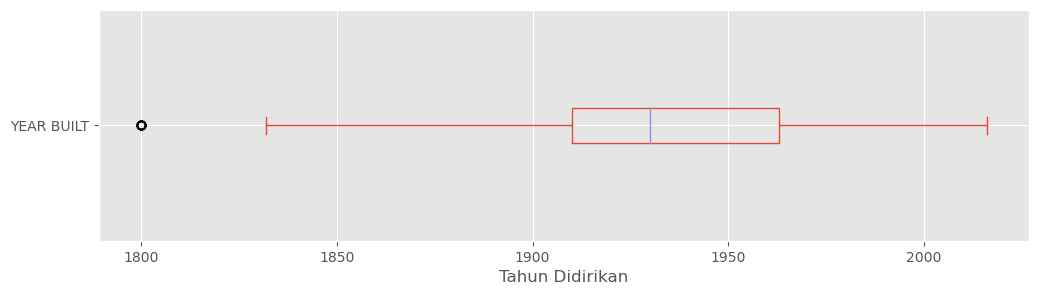

Rentang waktu bangunan didirikan pada BOROUGH 3 yaitu 216 tahun dimana bangunan paling tua didirikan dari tahun 1800 dan bangunan yg paling muda di tahun 2016
Varian tahun properti didirikan di NYC sebesar 1561.62
Dengan nilai standar deviasi sebesar 39.52
Nilai Skewness = 0.66 (positif) artinya data tersebut banyak properti yang didirikan di tahun muda sehingga membentuk distribusi positif
Nilai Kurtosis = -0.56 (negatif) dimana nilai kurtosis negatif yaitu distribusi landai dan data lebih banyak di bagian ekor
25% data property Quantile2 dibangun dibawah tahun 1920.0
50% data property Quantile3 dibangun di tahun 1940.0
25% data property Quantile4 dibangun di tahun 1965.0


In [46]:
build_max = borough3['YEAR BUILT'].max()
build_min = borough3['YEAR BUILT'].min()

df_year = borough3[['YEAR BUILT']]

df_year.plot(kind='box', vert=False, figsize=(12,3))
plt.xlabel('Tahun Didirikan')
plt.show()

range = build_max - build_min                   #periksa rentang waktu property dibangun
var = borough3['YEAR BUILT'].var(ddof=0)              #periksa variance populasi
stdeviation = borough3['YEAR BUILT'].std(ddof=0)      #periksa standar deviasi populasi
skew = borough3['YEAR BUILT'].skew()
kurt = borough3['YEAR BUILT'].kurtosis()


print('Rentang waktu bangunan didirikan pada BOROUGH 3 yaitu',range,'tahun', 'dimana bangunan paling tua didirikan dari tahun', build_min, 'dan bangunan yg paling muda di tahun', build_max )
print('Varian tahun properti didirikan di NYC sebesar',round(var,2))
print('Dengan nilai standar deviasi sebesar',round(stdeviation,2))
print('Nilai Skewness =',round(skew,2),'(positif) artinya data tersebut banyak properti yang didirikan di tahun muda sehingga membentuk distribusi positif')
print('Nilai Kurtosis =',round(kurt,2),'(negatif) dimana nilai kurtosis negatif yaitu distribusi landai dan data lebih banyak di bagian ekor')
print('========================================================================')
print('25% data property Quantile2 dibangun dibawah tahun',df['YEAR BUILT'].quantile(0.25))
print('50% data property Quantile3 dibangun di tahun',df['YEAR BUILT'].quantile(0.5))
print('25% data property Quantile4 dibangun di tahun',df['YEAR BUILT'].quantile(0.75))


In [31]:
cor_year_price = borough3['YEAR BUILT'].corr(borough3['SALE PRICE'])            #mencari korelasi tahun pembuatan antara borough 3 dan borough 4

print('Nilai korelasi R hampir mendekati 0 (',cor_year_price,') yang dapat diartikan bahwa tidak ada hubungannya antara tahun didirikan bangunan pada Borough 3 dengan Harga penjualannya')

Nilai korelasi R hampir mendekati 0 ( -0.00030919107933459337 ) yang dapat diartikan bahwa tidak ada hubungannya antara tahun didirikan bangunan pada Borough 3 dengan Harga penjualannya


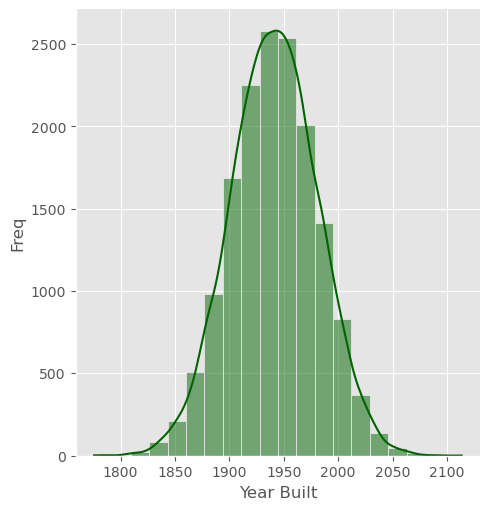

In [106]:
data_norm = scipy.stats.norm.rvs(size= len(borough3['YEAR BUILT']), loc=mean_year, scale=stdeviation)

sns.displot(data_norm,
            kde=True,
            bins=20,
            color='darkgreen',
            alpha=0.5)
plt.ylabel('Freq')
plt.xlabel('Year Built')
plt.show()


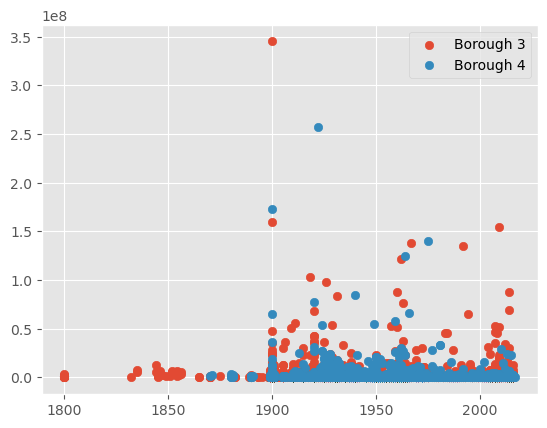

In [49]:
plt.scatter(borough3['YEAR BUILT'], borough3['SALE PRICE'], label='Borough 3')
plt.scatter(borough4['YEAR BUILT'], borough4['SALE PRICE'], label='Borough 4')
plt.legend()
plt.show()

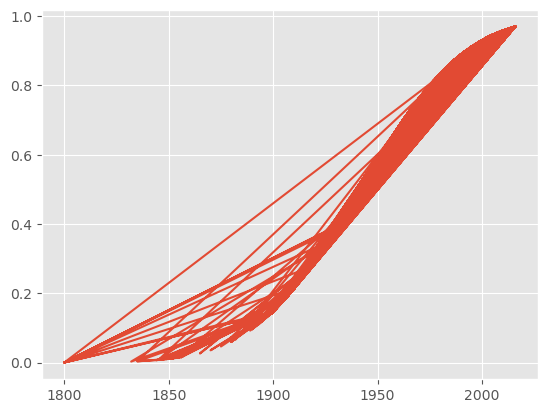

In [65]:
plt.plot(borough3['YEAR BUILT'], data_norm)